# Module 2: Example of linear classifier based in kernels

In this notebook, we will use the `Perceptron`, a linear classifier based in the scalar product implemented in `scikit-learn`, to classify the instances in the Iris flower dataset. Although we will also implement the 'kernel trick' to transform the data so it's easier to separate using linear boundaries, so to obtain better results.

Let's import the required classes:

In [ ]:
# Import packages
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [ ]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [ ]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100,)
xtest shape:  (50, 4)
ytest shape:  (50,)


We will now create the classifier. In this notebook, we will use the `Perceptron` implementation available in `scikit-learn`. In addition, we'll also use the `PolynomialFeatures` and `Pipeline` to implement the 'kernel trick' and combine this data transformation with the classification itself performed by the `Perceptron`.

The degree of the polynomial kernel we will use is 3, but feel free to try lower/higher order polynomials and check the results.

In [ ]:
# Init the Classifier
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', Perceptron())])

We can now train the model:

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 Perceptron(alpha=0.0001, class_weight=None,
                            early_stopping=False, eta0=1.0, fit_intercept=True,
                            max_iter=1000, n_iter_no_change=5, n_jobs=None,
                            penalty=None, random_state=0, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False))],
         verbose=False)

And once trained, predict the labels for the test set:

In [ ]:
# Predict Output 
preds = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(89.18, 0.5, 'Predicted')

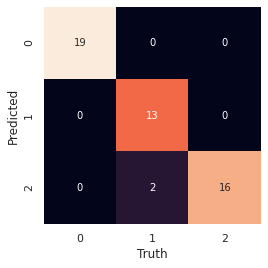

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Note how with a simple 3rd order polynomial kernel we were able to transform the data and now a simple `Perceptron` *always* can correctly classify most samples, unlike the previous example with the vanila `Perceptron`, where we had to play with the `random_state` to get the network to a good enough local minima.

We can also compute the most common classification metrics with the help of sklearn.metrics.classification_report. These metrics include the precission, recall, f1-score and support of each class. For more information regarding these metrics, you can refer to the theoretical slides or access the documentation.

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.87      0.93        15
           2       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Finally, we can also graphically show the decision boundaries for the 3 classes. However, since we will visualize them in 2 dimensions, we'll need to re-train the algorithm with just 2 of the 4 available variables. For this example, we'll take the first 2, but feel free to try with any other combination!

(0.0, 7.88, -0.9, 3.4800000000000044)

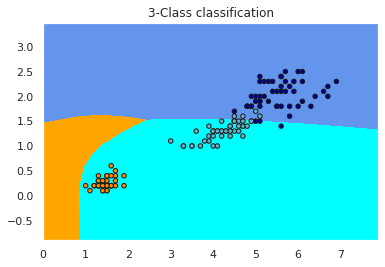

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris.data[:, 2:4]
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Train the model 
model.fit(xtrain[:, 2:4], ytrain) # to visualize in 2-dim, we can only take 2 variables
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')

Even if this visualisation is not fair, because we are only using 2 variables out of the 4 available, we can see how the polynomial kernel curves the decision boundary.